In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [2]:
FILE_NAME = '../project/mix_abalone_train.csv'

In [3]:
abalone_train = pd.read_csv(FILE_NAME)
abalone_train.shape

(94792, 9)

In [4]:
with open('unique.csv', mode = 'w') as f:

    for i in range(len(abalone_train.columns)):
        f.write(f'{abalone_train.columns[i]}, {abalone_train.iloc[:,i].unique()} \n')

In [5]:
abalone_train.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


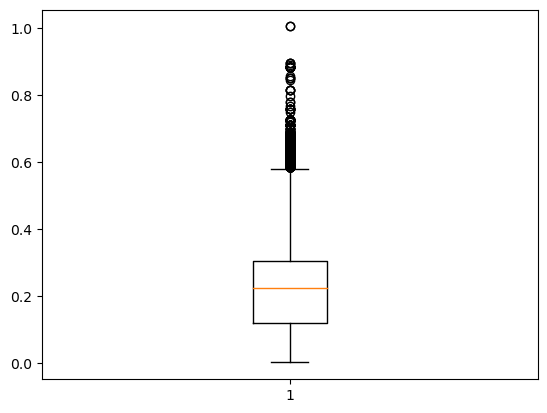

In [6]:
plt.boxplot(abalone_train['Shell_weight'])
plt.show()

In [7]:
abalone_train['Shell_weight'].describe()

count    94792.000000
mean         0.226468
std          0.130639
min          0.001500
25%          0.120000
50%          0.225000
75%          0.305000
max          1.005000
Name: Shell_weight, dtype: float64

In [8]:
abalone_train = abalone_train[abalone_train['Height'] != 0.].copy()
abalone_train.reset_index(inplace=True, drop=True)
abalone_train.shape

(94784, 9)

In [9]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [10]:
abalone_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [11]:
abalone_train = pd.get_dummies(abalone_train)

In [12]:
abalone_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [13]:
abalone_train.replace(True, 1, inplace = True)
abalone_train.replace(False, 0, inplace = True)

In [14]:
abalone_train['Rings'] = abalone_train['Rings'] + 1.5

In [15]:
feature_df = abalone_train[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Rings', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone_train['Whole_weight']

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_df_scaled = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)

In [17]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Rings,Shucked_weight,Viscera_weight,Shell_weight
0,1,0,0,0.550,0.430,0.150,12.5,0.3285,0.1465,0.2400
1,1,0,0,0.630,0.490,0.145,12.5,0.4580,0.2765,0.3200
2,0,1,0,0.160,0.110,0.025,7.5,0.0055,0.0030,0.0050
3,0,0,1,0.595,0.475,0.150,11.5,0.3755,0.2055,0.2500
4,0,1,0,0.555,0.425,0.130,10.5,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...,...,...
94779,1,0,0,0.565,0.450,0.165,12.5,0.3700,0.2390,0.2490
94780,0,0,1,0.590,0.440,0.135,11.5,0.4390,0.2145,0.2605
94781,0,0,1,0.600,0.475,0.205,10.5,0.5255,0.2875,0.3080
94782,1,0,0,0.625,0.485,0.150,11.5,0.5310,0.2610,0.2960


In [18]:
feature_df_scaled

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Rings,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.0,0.0,0.641892,0.630252,0.129663,0.357143,0.220242,0.192232,0.237668
1,1.0,0.0,0.0,0.750000,0.731092,0.125222,0.357143,0.307330,0.363397,0.317389
2,0.0,1.0,0.0,0.114865,0.092437,0.018650,0.178571,0.003026,0.003292,0.003488
3,0.0,0.0,1.0,0.702703,0.705882,0.129663,0.321429,0.251849,0.269914,0.247633
4,0.0,1.0,0.0,0.648649,0.621849,0.111901,0.285714,0.247814,0.210007,0.195316
...,...,...,...,...,...,...,...,...,...,...
94779,1.0,0.0,0.0,0.662162,0.663866,0.142984,0.357143,0.248151,0.314022,0.246637
94780,0.0,0.0,1.0,0.695946,0.647059,0.116341,0.321429,0.294553,0.281764,0.258097
94781,0.0,0.0,1.0,0.709459,0.705882,0.178508,0.285714,0.352724,0.377880,0.305431
94782,1.0,0.0,0.0,0.743243,0.722689,0.129663,0.321429,0.356422,0.342989,0.293473


In [19]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Rings,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.00000
mean,0.293320,0.363236,0.343444,0.517413,0.401961,0.135654,11.207408,0.341613,0.169923,0.22647
std,0.455286,0.480935,0.474861,0.118306,0.098086,0.038174,3.178764,0.205267,0.101333,0.13064
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.004000,2.500000,0.001000,0.000500,0.00150
25%,0.000000,0.000000,0.000000,0.445000,0.345000,0.110000,9.500000,0.177500,0.087000,0.12000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,10.500000,0.330000,0.166000,0.22500
75%,1.000000,1.000000,1.000000,0.600000,0.470000,0.160000,12.500000,0.464500,0.233000,0.30500
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,30.500000,1.488000,0.760000,1.00500


In [20]:
target_sr.describe()

count    94784.000000
mean         0.790825
std          0.459227
min          0.002000
25%          0.419500
50%          0.799500
75%          1.072500
max          2.825500
Name: Whole_weight, dtype: float64

## [2] test, train 분리

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df_scaled,target_sr, test_size=0.2, random_state=12)

In [22]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


## [3] 앙상블 - Voting

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [24]:
k_model = KNeighborsRegressor()
l_model = LinearRegression()
dt_model = DecisionTreeClassifier(random_state= 10)


## [3] 앙상블 - Bagging

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
lf_model = RandomForestRegressor(random_state=12, oob_score= True)
lf_model.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=12)

In [27]:
# 모델 파라미터 
# print(f'classes_ : {lf_model.classes_}')
# print(f'n_classes_ : {lf_model.n_classes_}개')
# print()
print(f'feature_names_in_ : {lf_model.feature_names_in_}')
print(f'n_features_in_ : {lf_model.n_features_in_}개')
print(f'feature_importances_ : {lf_model.feature_importances_}')

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Rings'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [1.74594905e-04 1.12666921e-04 1.77731496e-04 2.41363727e-01
 1.12545400e-02 1.43783418e-03 1.35349310e-03 5.23678754e-02
 6.68135399e-01 2.36221372e-02]


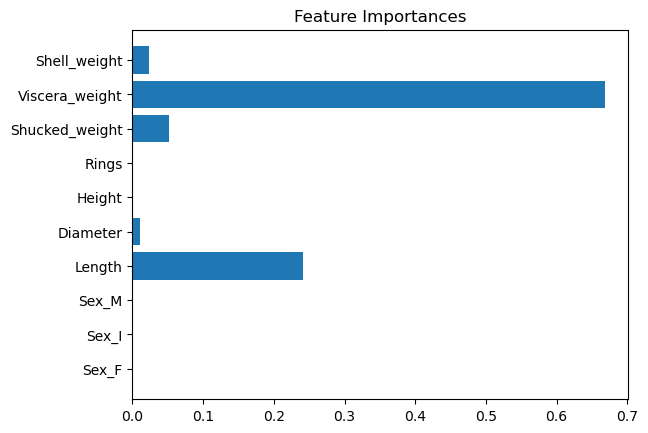

In [28]:
plt.barh(range(lf_model.n_features_in_), lf_model.feature_importances_ )
plt.yticks(range(lf_model.n_features_in_), lf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

In [29]:
print(f'oob_score_ : {lf_model.oob_score_}')

oob_score_ : 0.9877962055235844


In [30]:
train_score = lf_model.score(x_train, y_train)
test_score = lf_model.score(x_test, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9983021554680056, test_score : 0.9879686946676688


## [4] 튜닝

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [43]:
params = {'max_depth' : range(5,20), 
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson']}

In [44]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)

In [45]:
search_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [46]:
search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=16, min_samples_leaf=3;, score=0.989 total time=   6.8s
[CV 2/5] END criterion=squared_error, max_depth=16, min_samples_leaf=3;, score=0.988 total time=   6.7s
[CV 3/5] END criterion=squared_error, max_depth=16, min_samples_leaf=3;, score=0.988 total time=   6.8s
[CV 4/5] END criterion=squared_error, max_depth=16, min_samples_leaf=3;, score=0.988 total time=   6.9s
[CV 5/5] END criterion=squared_error, max_depth=16, min_samples_leaf=3;, score=0.988 total time=   7.2s
[CV 1/5] END criterion=poisson, max_depth=11, min_samples_leaf=4;, score=0.988 total time=   3.8s
[CV 2/5] END criterion=poisson, max_depth=11, min_samples_leaf=4;, score=0.988 total time=   4.3s
[CV 3/5] END criterion=poisson, max_depth=11, min_samples_leaf=4;, score=0.987 total time=   5.4s
[CV 4/5] END criterion=poisson, max_depth=11, min_samples_leaf=4;, score=0.988 total time=  11.6s
[CV 5/5] END criterion=poi

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(2, 5)},
                   verbose=4)

In [47]:
print(f'[search_cv.best_score_] {search_cv.best_score_}')
print(f'[search_cv.best_param] {search_cv.best_params_}')
print(f'[search_cv.best_estimator_] {search_cv.best_estimator_}')

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df

[search_cv.best_score_] 0.9883353161907781
[search_cv.best_param] {'min_samples_leaf': 2, 'max_depth': 19, 'criterion': 'squared_error'}
[search_cv.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=19, min_samples_leaf=2,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.729235,0.170193,0.239333,0.006317,3,16,squared_error,"{'min_samples_leaf': 3, 'max_depth': 16, 'crit...",0.988891,0.988093,0.987891,0.988140,0.988145,0.988232,0.000342,10
1,7.146709,3.468842,0.370980,0.160492,4,11,poisson,"{'min_samples_leaf': 4, 'max_depth': 11, 'crit...",0.988344,0.987524,0.987367,0.987587,0.987470,0.987658,0.000350,32
2,6.343614,0.173897,0.304627,0.020051,3,7,poisson,"{'min_samples_leaf': 3, 'max_depth': 7, 'crite...",0.985777,0.984675,0.984729,0.985035,0.985077,0.985059,0.000393,42
3,3.842515,0.695159,0.195885,0.068129,3,5,squared_error,"{'min_samples_leaf': 3, 'max_depth': 5, 'crite...",0.982625,0.981292,0.981355,0.981926,0.981406,0.981721,0.000505,46
4,1.455260,0.070515,0.067587,0.007021,2,5,poisson,"{'min_samples_leaf': 2, 'max_depth': 5, 'crite...",0.981420,0.979965,0.980780,0.981366,0.980617,0.980830,0.000535,50
5,3.143076,1.540083,0.162904,0.082317,4,5,poisson,"{'min_samples_leaf': 4, 'max_depth': 5, 'crite...",0.981390,0.979992,0.980692,0.981699,0.980791,0.980913,0.000593,48
6,21.881033,0.153719,0.723815,0.013999,3,15,poisson,"{'min_samples_leaf': 3, 'max_depth': 15, 'crit...",0.988842,0.988064,0.987920,0.988124,0.988087,0.988207,0.000325,11
7,3.293401,2.222073,0.157897,0.110380,3,8,poisson,"{'min_samples_leaf': 3, 'max_depth': 8, 'crite...",0.986803,0.985805,0.985710,0.986017,0.985844,0.986036,0.000397,41
8,3.471273,0.014167,0.148540,0.003437,2,11,poisson,"{'min_samples_leaf': 2, 'max_depth': 11, 'crit...",0.988338,0.987562,0.987483,0.987652,0.987561,0.987719,0.000314,30
9,7.726445,0.016079,0.243934,0.005664,3,17,poisson,"{'min_samples_leaf': 3, 'max_depth': 17, 'crit...",0.988885,0.988116,0.987956,0.988177,0.988113,0.988249,0.000326,7


In [37]:
params = {'max_depth' : range(2,10), 
          'min_samples_leaf' : range(5,15),
          'criterion' : ['squared_error','poisson']}

In [38]:
rf_model_u = ExtraTreesRegressor(random_state=12, oob_score=True)

In [39]:
search_cv_u = RandomizedSearchCV(rf_model_u, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [40]:
search_cv_u.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=poisson, max_depth=8, min_samples_leaf=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=8, min_samples_leaf=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=8, min_samples_leaf=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=8, min_samples_leaf=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=8, min_samples_leaf=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=7, min_samples_leaf=11;, score=nan total time=   0.0s
[CV 2/5] END criterion=poisson, max_depth=7, min_samples_leaf=11;, score=nan total time=   0.0s
[CV 3/5] END criterion=poisson, max_depth=7, min_samples_leaf=11;, score=nan total time=   0.0s
[CV 4/5] END criterion=poisson, max_depth=7, min_samples_leaf=11;, score=nan total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=7, min_samples_leaf=11;, score=n

ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True


In [ ]:
print(f'[search_cv_u.best_score_] {search_cv_u.best_score_}')
print(f'[search_cv_u.best_param] {search_cv_u.best_params_}')
print(f'[search_cv_u.best_estimator_] {search_cv_u.best_estimator_}')

cv_result_df_u = pd.DataFrame(search_cv_u.cv_results_)
cv_result_df_u

[search_cv_u.best_score_] 0.6214579347235933
[search_cv_u.best_param] {'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'squared_error'}
[search_cv_u.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=9, min_samples_leaf=6,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.612711,0.065929,0.088827,0.007462,13,7,squared_error,"{'min_samples_leaf': 13, 'max_depth': 7, 'crit...",0.592515,0.592238,0.578496,0.595132,0.594042,0.590485,0.006086,12
1,1.993745,0.035544,0.115480,0.001875,14,9,squared_error,"{'min_samples_leaf': 14, 'max_depth': 9, 'crit...",0.625095,0.625541,0.609210,0.623267,0.620393,0.620701,0.006024,5
2,1.176607,0.009502,0.053166,0.006047,11,4,poisson,"{'min_samples_leaf': 11, 'max_depth': 4, 'crit...",0.507629,0.508104,0.484745,0.504613,0.512755,0.503569,0.009766,36
3,2.055571,0.018309,0.114045,0.005855,7,9,squared_error,"{'min_samples_leaf': 7, 'max_depth': 9, 'crite...",0.625552,0.625571,0.609973,0.624099,0.621885,0.621416,0.005878,2
4,2.051892,0.014440,0.114667,0.003846,8,9,squared_error,"{'min_samples_leaf': 8, 'max_depth': 9, 'crite...",0.625280,0.624060,0.608108,0.623614,0.622345,0.620681,0.006356,6
5,1.861108,0.010315,0.088789,0.005920,11,7,poisson,"{'min_samples_leaf': 11, 'max_depth': 7, 'crit...",0.584868,0.589188,0.575257,0.591539,0.587541,0.585679,0.005646,21
6,1.228163,0.031225,0.065094,0.004538,9,5,squared_error,"{'min_samples_leaf': 9, 'max_depth': 5, 'crite...",0.537452,0.540907,0.517643,0.538706,0.534906,0.533923,0.008368,26
7,0.991246,0.013420,0.046905,0.003339,11,3,poisson,"{'min_samples_leaf': 11, 'max_depth': 3, 'crit...",0.476822,0.477942,0.454305,0.474818,0.481015,0.472980,0.009551,44
8,1.803940,0.029082,0.100282,0.005494,14,8,squared_error,"{'min_samples_leaf': 14, 'max_depth': 8, 'crit...",0.612087,0.610632,0.594137,0.612551,0.611715,0.608225,0.007072,8
9,1.405542,0.004833,0.068744,0.004304,5,5,poisson,"{'min_samples_leaf': 5, 'max_depth': 5, 'crite...",0.537599,0.535657,0.511862,0.537115,0.534919,0.531430,0.009832,30
